# Playstyle column 

In [1]:
#Import dependencies
import pandas as pd
import os
import numpy as np
import scipy.stats as stats
import re
from matplotlib import pyplot as plt
from scipy.stats import linregress
import matplotlib.pyplot as mp

In [2]:
#Import csv where we cleaned NAs
## 11682 rows 
cleaned_df = pd.read_csv("cleaned_data_js_sc_rg.csv", encoding = "ISO-8859-1")
cleaned_df = pd.DataFrame(cleaned_df)

cleaned_df.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA
2,3.0,42052.03860,Not difficult at all,Other,PC,0.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8.0,17.0,31.0,DEU,DEU
3,4.0,42052.06804,Not difficult at all,Other,PC,20.0,I play for fun,improving,Unranked,5.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0.0,17.0,11.0,USA,USA
4,5.0,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,Unranked,1.0,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14.0,14.0,13.0,KOR,USA


In [3]:
# cleaned_df = cleaned_df.dropna()
# cleaned_df

## drop 11542

In [4]:
#11598 rows 
countries_df=cleaned_df[cleaned_df["Residence_ISO3"].notna()]
countries_df = pd.DataFrame(countries_df)
countries_df

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA
2,3.0,42052.03860,Not difficult at all,Other,PC,0.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),Germany,Germany,Singleplayer,Accept,8.0,17.0,31.0,DEU,DEU
3,4.0,42052.06804,Not difficult at all,Other,PC,20.0,I play for fun,improving,Unranked,5.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,0.0,17.0,11.0,USA,USA
4,5.0,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,Unranked,1.0,...,High school diploma (or equivalent),USA,South Korea,Multiplayer,Accept,14.0,14.0,13.0,KOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,14247.0,42057.81185,Extremely difficult,League of Legends,PC,20.0,I play for fun,winning,Unranked,20.0,...,High school diploma (or equivalent),USA,USA,Multiplayer,Accept,20.0,23.0,25.0,USA,USA
11679,14248.0,42058.16964,Not difficult at all,Starcraft 2,PC,20.0,I play for fun,having fun,Ranked - Gold,14.0,...,High school diploma (or equivalent),Norway,Norway,Multiplayer,Accept,0.0,32.0,10.0,NOR,NOR
11680,14249.0,42058.24420,Somewhat difficult,Other,"Console (PS, Xbox, ...)",5.0,I play for fun,having fun,Unranked,0.0,...,High school diploma (or equivalent),Canada,Canada,Singleplayer,Accept,13.0,16.0,32.0,CAN,CAN
11681,14250.0,42058.36375,Somewhat difficult,Starcraft 2,PC,15.0,I play for fun,improving,Ranked - Diamond,8.0,...,High school diploma (or equivalent),Canada,Canada,Multiplayer,Accept,2.0,25.0,14.0,CAN,CAN


In [5]:
countries_df['Age'].max()

56.0

In [6]:
cleaned_df['Age'].max()

56.0

In [7]:
list_all = countries_df.columns
list_all

Index(['S. No.', 'Timestamp', 'GADE', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
       'Degree', 'Birthplace', 'Residence', 'Playstyle', 'accept', 'GAD_T',
       'SWL_T', 'SPIN_T', 'Residence_ISO3', 'Birthplace_ISO3'],
      dtype='object')

In [8]:
# countries_df2 = pd.DataFrame(countries_df, columns = ['GADE', 'Game', 'Platform', 'earnings', 'whyplay', 'League', 'streams', 'Narcissism', 'Gender', 'Age', 'Work',
#        'Degree','Residence', 'Playstyle',])
# print(countries_df)

Is there a relationship between mental health disorder prevalence and different demographics?
- Degree |  hours
- GAD_T | SWL_T | SPIN_T
- Narcissism
- gender | age
- Work | earnings
- whyplay | playstyle
- League | Game
- Platform | streams

# summary satistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = countries_df.groupby('Gender').mean()['GAD_T']
median = countries_df.groupby('Gender').median()['GAD_T']
variance = countries_df.groupby('Gender').var()['GAD_T']
stdev = countries_df.groupby('Gender').std()['GAD_T']
sem = countries_df.groupby('Gender').sem()['GAD_T']

# Assemble the resulting series into a single summary dataframe.
summary_stat1 = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance,
                        "Standard Deviation": stdev, "SEM":sem})
summary_stat1

,Mean,Median,Variance,Standard Deviation,SEM
Gender,,,,,
Female,7.776923,7.0,29.923966,5.470280,0.214562
Male,5.287718,4.0,20.734243,4.553487,0.043595
Other,10.315789,10.0,38.654339,6.217261,1.008573


#### Generalised Anxiety Disorder - GAD

In [10]:
GAD_mean = round(countries_df['GAD_T'].astype('float').mean(), 2)
GAD_median = round(countries_df['GAD_T'].astype('float').median(), 2)
GAD_mode = round(countries_df['GAD_T'].astype('float').mode(), 2)

print(f"GAD Rate Mean: {GAD_mean}")
print(f"GAD Rate Median {GAD_median}")
print(f"GAD Rate mode {GAD_mode}")

GAD Rate Mean: 5.44
GAD Rate Median 4.0
GAD Rate mode 0    2.0
dtype: float64


In [11]:
SWL_mean = round(countries_df['SWL_T'].astype('float').mean(), 2)
SWL_median = round(countries_df['SWL_T'].astype('float').median(), 2)
SWL_mode = round(countries_df['SWL_T'].astype('float').mode(), 2)

print(f"SWL Rate Mean: {SWL_mean}")
print(f"SWL Rate Median {SWL_median}")
print(f"SWL Rate mode {SWL_mode}")

SWL Rate Mean: 19.63
SWL Rate Median 20.0
SWL Rate mode 0    24.0
dtype: float64


## gender 

In [12]:
gender = countries_df.groupby(['S. No.', 'Gender'])
gender_df= pd.DataFrame(gender.size())

count_gender = pd.DataFrame(gender_df.groupby(['Gender']).count())
count_gender.columns = ['Total Count']
count_gender

,Total Count
Gender,
Female,650
Male,10910
Other,38


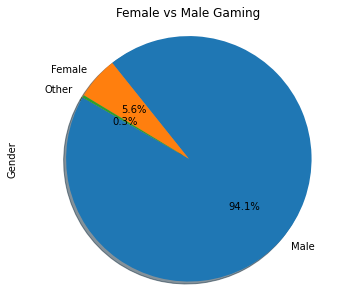

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_gender = countries_df['Gender'].value_counts()

fig1, ax1 = plt.subplots(figsize=(6,5))
pie = count_gender.plot.pie(figsize=(6,5), shadow=True, autopct='%1.1f%%', startangle=150)
plt.title('Female vs Male Gaming')
plt.ylabel('Gender')

plt.axis('equal')
# plt.savefig("Male_vs_Females.png")
plt.show()

In [14]:
countries_df['GADE'].unique()

array(['Not difficult at all', 'Somewhat difficult', 'Very difficult',
       'Extremely difficult', nan], dtype=object)

In [15]:
countries_df['Gender'].value_counts()

Male      10910
Female      650
Other        38
Name: Gender, dtype: int64

# Age

In [16]:
# def group_age(Age):
# # countries_df['Age']
#     if age < 34:
#         return '18-34'
#     elif age < 44:
#         return '35-44'
#     else:
#         return '45-56'

In [17]:
# df_age = pd.DataFrame({'Age': np.random.randint(18, 56, 4)})
# df_age['age_bin'] = pd.cut(x=df_age['Age'], bins=[18, 24, 34, 44, 56])
# df_age

In [18]:
# age_group = pd.DataFrame({'Age':[18,24,34,44,56]})

# bins= [18,24,34,44,56]
# labels = ['Youth','Adult','young adult','middle-age adult']
# age_group['AgeGroup'] = pd.cut(age_group['Age'], bins=bins, labels=labels, right=False)
# print (countries_df)

In [21]:
# create new data_age group by
data_age = cleaned_df.copy()
cleaned_df.loc[data_age['Age'].between(18,19), 'age_group'] = '18 teenage'
cleaned_df.loc[data_age['Age'].between(20,24), 'age_group'] = 'adult 20-24 youth'
cleaned_df.loc[data_age['Age'].between(25,39), 'age_group'] = 'adult 25-39'
cleaned_df.loc[data_age['Age'].between(40,56), 'age_group'] = 'older_adult 40-56'
data_age.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,age_group
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA,adult 25-39
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA,older_adult 40-56
2,3.0,42052.03860,Not difficult at all,Other,PC,0.0,I play for fun,having fun,Unranked,0.0,...,Germany,Germany,Singleplayer,Accept,8.0,17.0,31.0,DEU,DEU,adult 25-39
3,4.0,42052.06804,Not difficult at all,Other,PC,20.0,I play for fun,improving,Unranked,5.0,...,USA,USA,Multiplayer,Accept,0.0,17.0,11.0,USA,USA,adult 25-39
4,5.0,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,Unranked,1.0,...,USA,South Korea,Multiplayer,Accept,14.0,14.0,13.0,KOR,USA,18 teenage


In [22]:
numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
age_df = data_age.groupby(['age_group']).agg(['count', 'mean', 'sum'])[numeric_columns]
age_df

GAD_T                    SWL_T                      SPIN_T  \
                  count      mean      sum count       mean       sum  count   
age_group                                                                      
18 teenage         4948  5.517987  27303.0  4948  19.944422   98685.0   4948   
adult 20-24 youth  5262  5.503801  28961.0  5262  19.231471  101196.0   5262   
adult 25-39        1458  5.015775   7313.0  1458  19.858025   28953.0   1458   
older_adult 40-56    14  5.500000     77.0    14  23.357143     327.0     14   

                                        
                        mean       sum  
age_group                               
18 teenage         21.632377  107037.0  
adult 20-24 youth  19.686431  103590.0  
adult 25-39        17.294239   25215.0  
older_adult 40-56  15.000000     210.0

age_group
18 teenage           4948
adult 20-24 youth    5262
adult 25-39          1458
older_adult 40-56      14
Name: GAD_T, dtype: int64

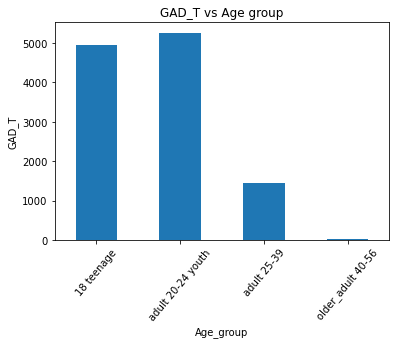

In [23]:
# Generate a bar plot showing the data of GAD_T for agegroup using Pandas.
data_age = data_age.groupby(["age_group"]).count()["GAD_T"]

# plot(kind='bar', figsize=(7,5), align='center', fontsize =8)
data_age.plot(kind='bar', legend=False, rot=50, align='center')
plt.title('GAD_T vs Age group')
plt.ylabel('GAD_T')
plt.xlabel('Age_group')
# plt.savefig('Bar_chart1')
plt.tight_layout
data_age

# age group (help by Joanna)

R squared: nan


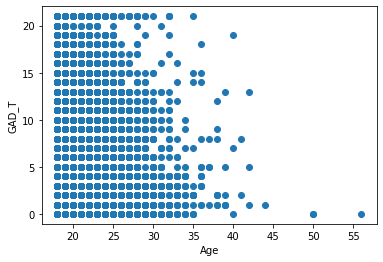

In [24]:
#  correlation
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = countries_df['Age'].astype('float')
y_values = countries_df['GAD_T'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Age')
plt.ylabel('GAD_T')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

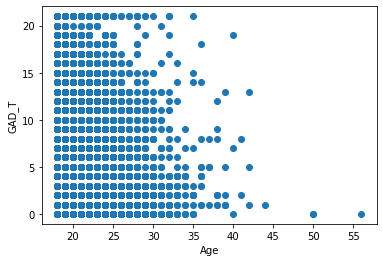

In [25]:
avg_gender = countries_df.loc[countries_df['Gender'] == 'Male', :]
maleavg= avg_gender.groupby('Gender').mean()
plt.scatter(avg_gender['Age'], avg_gender['GAD_T'])
plt.xlabel('Age')
plt.ylabel('GAD_T')
plt.savefig('scatterplot')
plt.show()

# GENDER

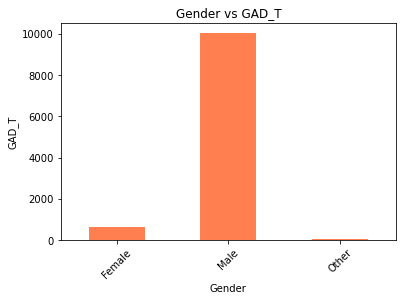

<Figure size 432x288 with 0 Axes>

In [27]:
# Filter data so it only includes gender type has GAD_T
cleaned_df = pd.DataFrame(cleaned_df.loc[cleaned_df['GAD_T']>0,:])


# Split up our data into groups based upon Gender
gender_group = cleaned_df.groupby('Gender')

# Find out gender type has GAD
GAD_count = gender_group['GAD_T'].count()

# Chart our data, give it a title, and label the axes
chart = GAD_count.plot(kind="bar", title="Gender vs GAD_T", rot=45, color='coral')
chart.set_xlabel("Gender")
chart.set_ylabel("GAD_T")

plt.show()
plt.tight_layout()

# Employment

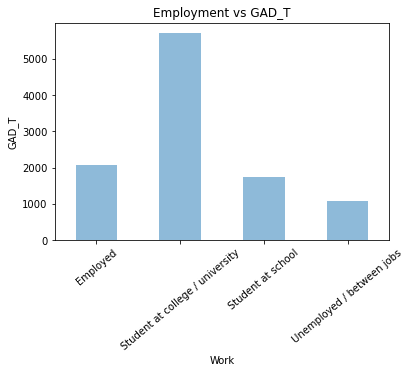

<Figure size 432x288 with 0 Axes>

In [30]:
# Filter data so it only includes patrons who checked out at least one item
countries_df = pd.DataFrame(countries_df.loc[countries_df['GAD_T']>0,:])

# Split up our data into groups based upon 'Patron Type Definition'
gender_group = countries_df.groupby('Work')

# Find out how many of each patron type borrowed library items
GAD_count = gender_group['GAD_T'].count()

# Chart our data, give it a title, and label the axes
chart = GAD_count.plot(kind="bar", title="Employment vs GAD_T", rot=40, alpha=0.5)
chart.set_xlabel("Work")
chart.set_ylabel("GAD_T")

plt.show()
plt.tight_layout()

# Degree/ education

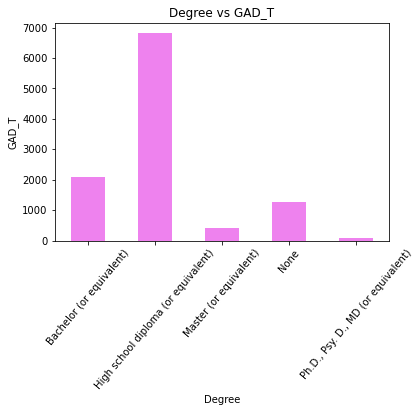

<Figure size 432x288 with 0 Axes>

In [32]:
# Filter data so it only includes patrons who checked out at least one item
countries_df = pd.DataFrame(countries_df.loc[countries_df['GAD_T']>0,:])

# Split up our data into groups based upon 'Patron Type Definition'
gender_group = countries_df.groupby('Degree')

# Find out how many of each patron type borrowed library items
GAD_count = gender_group['GAD_T'].count()

# Chart our data, give it a title, and label the axes
chart = GAD_count.plot(kind="bar", title="Degree vs GAD_T", rot=50, color='violet')
chart.set_xlabel("Degree")
chart.set_ylabel("GAD_T")

plt.show()
plt.tight_layout()

# USA

In [34]:
resident_df = countries_df['Residence'].value_counts()
resident_df

USA            3649
Germany        1142
UK              816
Canada          797
Netherlands     401
               ... 
Grenada           1
Cyprus            1
Indonesia         1
Jamaica           1
Palestine         1
Name: Residence, Length: 105, dtype: int64

In [35]:
work_df = countries_df['Work'].unique()
work_df

array(['Unemployed / between jobs', 'Employed',
       'Student at college / university', 'Student at school'],
      dtype=object)

In [36]:
work_df = countries_df['Work'].value_counts()
work_df

Student at college / university    5708
Employed                           2085
Student at school                  1746
Unemployed / between jobs          1097
Name: Work, dtype: int64

In [37]:
# create new file - Filter data to national settlements
USA_set = countries_df.loc[countries_df["Residence"]=="USA",:]
USA_set

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Degree,Birthplace,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA
5,6.0,42052.13119,Not difficult at all,Other,"Console (PS, Xbox, ...)",4.0,I play for fun,relaxing,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,1.0,17.0,13.0,USA,USA
7,9.0,42052.19737,Very difficult,Other,"Console (PS, Xbox, ...)",2.0,I play for fun,winning,Unranked,0.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,12.0,12.0,55.0,USA,USA
9,11.0,42052.24204,Somewhat difficult,Other,PC,14.0,I play for fun,having fun,Unranked,0.0,...,High school diploma (or equivalent),USA,USA,Singleplayer,Accept,19.0,27.0,6.0,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,14231.0,42056.37289,Somewhat difficult,Other,PC,21.0,I play for fun,having fun,Unranked,0.0,...,None,USA,USA,Multiplayer,Accept,11.0,28.0,13.0,USA,USA
11670,14237.0,42056.67219,Not difficult at all,League of Legends,PC,20.0,I play for fun,winning,Ranked - Gold,1.0,...,High school diploma (or equivalent),USA,USA,Multiplayer,Accept,2.0,27.0,33.0,USA,USA
11671,14238.0,42056.81326,Somewhat difficult,League of Legends,PC,10.0,I play for fun,having fun,Ranked - Silver,1.0,...,Bachelor (or equivalent),USA,USA,Multiplayer,Accept,2.0,17.0,23.0,USA,USA
11676,14245.0,42057.35267,Not difficult at all,League of Legends,PC,30.0,I play for fun,having fun,Ranked - Silver,10.0,...,High school diploma (or equivalent),USA,USA,Multiplayer,Accept,6.0,16.0,12.0,USA,USA


In [38]:
work_count_USA = USA_set['Work'].value_counts()
work_count_USA

Student at college / university    1912
Employed                            864
Student at school                   571
Unemployed / between jobs           302
Name: Work, dtype: int64

In [39]:
# Create new dataframe for data to chart
compare_employment = pd.DataFrame({"USA Employment": work_count_USA,
                                       "All National_employment": work_df})
compare_employment

,USA Employment,All National_employment
Student at college / university,1912,5708
Employed,864,2085
Student at school,571,1746
Unemployed / between jobs,302,1097


In [40]:
# Fill NA
compare_employment = compare_employment.fillna(0)
compare_employment

,USA Employment,All National_employment
Student at college / university,1912,5708
Employed,864,2085
Student at school,571,1746
Unemployed / between jobs,302,1097


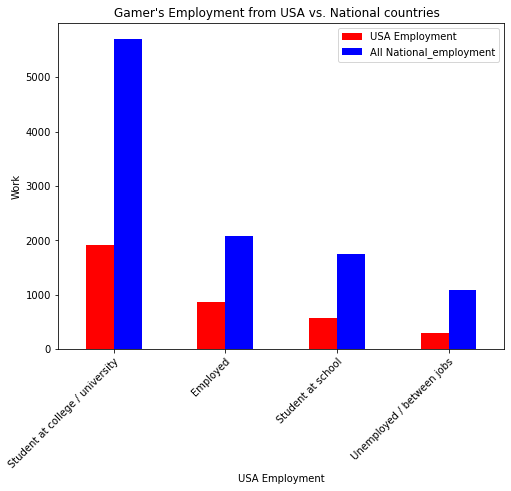

In [41]:
# Configure plot, figsize, title, and axis labels
figure1 = compare_employment.plot(kind="bar", color=["red", "blue"], figsize=(8,6),
                                   title="Gamer's Employment from USA vs. National countries  ",
                                   xlabel="USA Employment",
                                   ylabel="Work")

# Configure x-tick rotation
xticklabels = compare_employment.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

# help by joanna and akash

In [45]:
def group_age(age):
    if age < 19:
        return ("Teeanage")
    elif age < 24:
        return ("y_adult")
    elif age <39:
        return ("adult")
    elif age <56:
        return ("older_adult")

In [46]:
cleaned_df['Age_Groups'] = cleaned_df['Age'].map(group_age)
cleaned_df.head()

,S. No.,Timestamp,GADE,Game,Platform,Hours,earnings,whyplay,League,streams,...,Residence,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,age_group,Age_Groups
0,1.0,42052.00437,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,Unranked,0.0,...,USA,Singleplayer,Accept,1.0,23.0,5.0,USA,USA,adult 25-39,adult
1,2.0,42052.00680,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,Unranked,2.0,...,USA,Multiplayer,Accept,8.0,16.0,33.0,USA,USA,older_adult 40-56,older_adult
2,3.0,42052.03860,Not difficult at all,Other,PC,0.0,I play for fun,having fun,Unranked,0.0,...,Germany,Singleplayer,Accept,8.0,17.0,31.0,DEU,DEU,adult 25-39,adult
4,5.0,42052.08948,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,Unranked,1.0,...,South Korea,Multiplayer,Accept,14.0,14.0,13.0,KOR,USA,18 teenage,y_adult
5,6.0,42052.13119,Not difficult at all,Other,"Console (PS, Xbox, ...)",4.0,I play for fun,relaxing,Unranked,0.0,...,USA,Multiplayer,Accept,1.0,17.0,13.0,USA,USA,adult 20-24 youth,adult


In [47]:
numeric_columns = ["GAD_T", "SWL_T", "SPIN_T"]
by_age_df = cleaned_df.groupby(['Age_Groups']).agg(['count', 'mean', 'sum'])[numeric_columns]
by_age_df

GAD_T                    SWL_T                      SPIN_T  \
            count      mean      sum count       mean       sum  count   
Age_Groups                                                               
Teeanage     2840  6.109859  17352.0  2840  19.796127   56221.0   2840   
adult        1815  5.608264  10179.0  1815  19.233609   34909.0   1815   
older_adult    15  6.666667    100.0    15  18.800000     282.0     15   
y_adult      6039  5.965060  36023.0  6039  19.020202  114863.0   6039   

                                  
                  mean       sum  
Age_Groups                        
Teeanage     22.595775   64172.0  
adult        18.363636   33330.0  
older_adult  19.933333     299.0  
y_adult      20.924988  126366.0

In [48]:
by_age_df.index

Index(['Teeanage', 'adult', 'older_adult', 'y_adult'], dtype='object', name='Age_Groups')

In [50]:
GAD_age =['Teeanage', 'adult', 'older_adult', 'y_adult']
# bins = ['Teeanage', 'adult', 'older_adult', 'y_adult']
GAD_age_df = cleaned_df.groupby(['Age_Groups']).agg(['mean']).loc[GAD_age]['GAD_T']
SWL_age_df = cleaned_df.groupby(['Age_Groups']).agg(['mean']).loc[GAD_age]['SWL_T']
SPIN_age_df = cleaned_df.groupby(['Age_Groups']).agg(['mean']).loc[GAD_age]['SPIN_T']
#GAD_age_df['Age_Group'] = GAD_age_df.index.values
print(GAD_age_df.dtypes)
SPIN_age_df = cleaned_df.groupby(['Age_Groups']).agg(['mean']).loc[GAD_age]['SPIN_T']
age_group_df = pd.DataFrame()
age_group_df['Age_Groups'] = GAD_age_df.index.values
age_group_df['GAD_age_df'] = GAD_age_df['mean'].values
age_group_df['SWL_age_df'] = SWL_age_df['mean'].values
age_group_df['SPIN_age_df'] = SPIN_age_df['mean'].values

age_group_df.head()

mean    float64
dtype: object


,Age_Groups,GAD_age_df,SWL_age_df,SPIN_age_df
0,Teeanage,6.109859,19.796127,22.595775
1,adult,5.608264,19.233609,18.363636
2,older_adult,6.666667,18.800000,19.933333
3,y_adult,5.965060,19.020202,20.924988


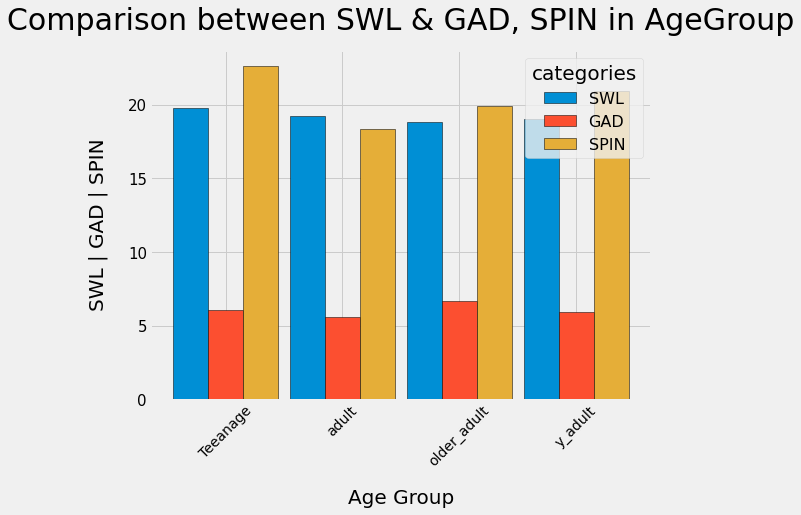

In [51]:
age_group_df['SWL_age_df'] = SWL_age_df['mean'].values
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")

#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (8,6))
#extract the labels
label = age_group_df['Age_Groups']
#use this to create x ticks to add the data to
x = np.arange(len(label))
#set a width for each bar 
width = 0.3
#create out first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left
rect1 = ax.bar(x - width,
              age_group_df["SWL_age_df"],
              width = width, 
               label = "SWL",
               edgecolor = "black"
              )
#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x ,
              age_group_df["GAD_age_df"],
              width = width,
              label = "GAD",
              edgecolor = "black")
rect3 = ax.bar(x + width,
              age_group_df["SPIN_age_df"],
              width = width,
              label = "SPIN",
              edgecolor = "black")
#add the labels to the axis
ax.set_ylabel("SWL | GAD | SPIN",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Age Group",
             fontsize = 20,
             labelpad =20)
ax.set_title("Comparison between SWL & GAD, SPIN in AgeGroup",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(title = "categories",
         fontsize = 16,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 45)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

# plt.savefig('AgeGroup_comparison')




